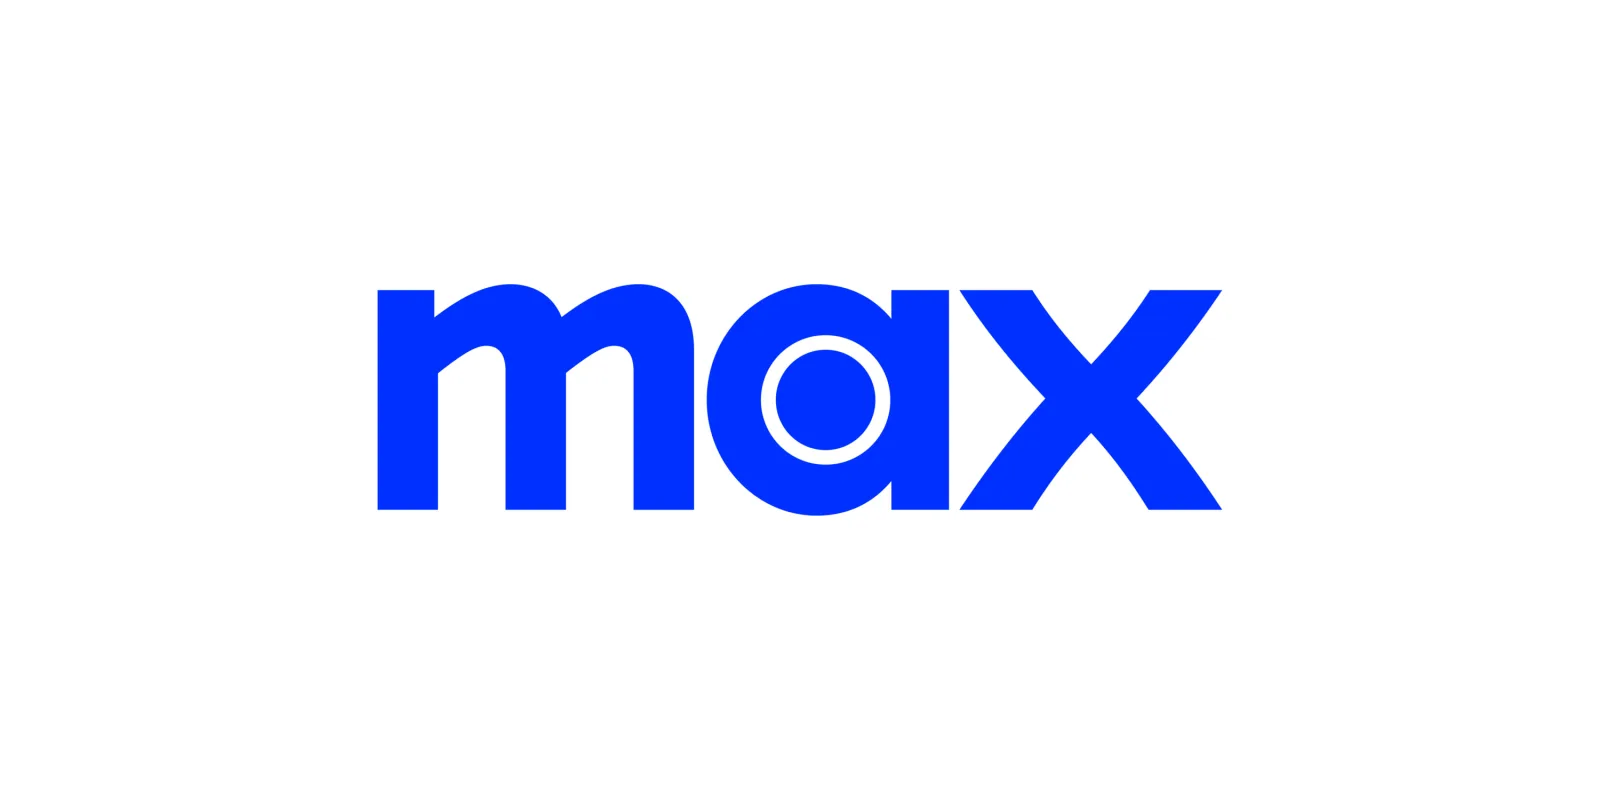

Color palette:  ['#000000', '#941DE8','#7A6BE2','#7BA7F2']

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [2]:
hbo_max = pd.read_csv('hbo_titles.csv')

In [3]:
hbo_max.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,577842.0,22.005,8.167
1,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,406105.0,56.631,7.583
2,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,446627.0,19.900,8.022
3,tm3175,Meet Me in St. Louis,MOVIE,In the year before the 1904 St. Louis World's ...,1945,NaN,113,"['drama', 'family', 'romance', 'music', 'comedy']",['US'],NaN,tt0037059,7.5,25589.0,8.311,7.000
4,ts225761,Tom and Jerry,SHOW,Tom and Jerry is an American animated franchis...,1940,NaN,8,"['animation', 'comedy', 'family', 'action']",['US'],16.0,tt6422744,7.7,859.0,1.400,10.000


In [4]:
hbo_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3030 non-null   object 
 1   title                 3030 non-null   object 
 2   type                  3030 non-null   object 
 3   description           3021 non-null   object 
 4   release_year          3030 non-null   int64  
 5   age_certification     1911 non-null   object 
 6   runtime               3030 non-null   int64  
 7   genres                3030 non-null   object 
 8   production_countries  3030 non-null   object 
 9   seasons               622 non-null    float64
 10  imdb_id               2768 non-null   object 
 11  imdb_score            2731 non-null   float64
 12  imdb_votes            2714 non-null   float64
 13  tmdb_popularity       3013 non-null   float64
 14  tmdb_score            2858 non-null   float64
dtypes: float64(5), int64(

In [5]:
hbo = hbo_max.copy()

In [6]:
def null_rate_fn(df):
    for i in df.columns:
        null_rate = df[i].isna().sum()/len(df) *100
        if null_rate > 0 :
            print('{} null rate is {}%'.format(i, round(null_rate,2)))

In [7]:
null_rate_fn(hbo)

description null rate is 0.3%
age_certification null rate is 36.93%
seasons null rate is 79.47%
imdb_id null rate is 8.65%
imdb_score null rate is 9.87%
imdb_votes null rate is 10.43%
tmdb_popularity null rate is 0.56%
tmdb_score null rate is 5.68%


In [8]:
if len(hbo[(hbo['type'] == 'MOVIE') & hbo['seasons'].isna()]) == hbo['seasons'].isna().sum():
    print('1')
else:
    print('0')

1


In [9]:
hbo['seasons'] = hbo['seasons'].fillna('0')

In [10]:
hbo['primary_genre'] = hbo['genres'].apply(lambda x: x.strip("[ ").strip("]").split(",")[0])

In [11]:
hbo['primary_genre'] = hbo['primary_genre'].str.replace("'", "")

In [12]:
hbo['production_country'] = hbo['production_countries'].apply(lambda x: x.strip("[ ").strip("]").split(",")[0])

In [13]:
hbo['production_country'] = hbo['production_country'].str.replace("'", "")

In [14]:
hbo.production_country.unique()

array(['US', 'DE', 'IT', 'SE', 'GB', 'JP', 'FR', 'SU', '', 'MX', 'DK',
       'CH', 'XC', 'BE', 'AU', 'CU', 'DZ', 'IN', 'BR', 'CA', 'PL', 'ES',
       'MC', 'SN', 'HK', 'NO', 'AT', 'IL', 'NZ', 'AR', 'KR', 'NL', 'IE',
       'IR', 'CZ', 'HU', 'IS', 'AE', 'BG', 'LU', 'GT', 'ZA', 'RO', 'RU',
       'CN', 'EG', 'CL', 'SG', 'FI', 'ID', 'TW', 'PR', 'MK', 'PT', 'BO',
       'PE', 'CO', 'UY', 'EC', 'PH', 'NG', 'DO', 'PA'], dtype=object)

In [15]:
import pycountry

In [16]:
abbreviated_countries = hbo['production_country']

full_countries = []
for abbreviations in abbreviated_countries:
    country_names = []
    for abbreviation in abbreviations.strip("[]'").split(', '):
        try:
            country = pycountry.countries.get(alpha_2=abbreviation.strip())
            if country is not None:
                country_names.append(country.name)
        except KeyError:
            pass
    full_countries.append(country_names)

In [17]:
hbo['country_name'] = full_countries

In [18]:
hbo.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,production_country,country_name
0,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,"['drama', 'romance', 'war']",['US'],0,tt0034583,8.5,577842.0,22.005,8.167,drama,US,[United States]
1,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],0,tt0032138,8.1,406105.0,56.631,7.583,fantasy,US,[United States]
2,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],0,tt0033467,8.3,446627.0,19.900,8.022,drama,US,[United States]
3,tm3175,Meet Me in St. Louis,MOVIE,In the year before the 1904 St. Louis World's ...,1945,NaN,113,"['drama', 'family', 'romance', 'music', 'comedy']",['US'],0,tt0037059,7.5,25589.0,8.311,7.000,drama,US,[United States]
4,ts225761,Tom and Jerry,SHOW,Tom and Jerry is an American animated franchis...,1940,NaN,8,"['animation', 'comedy', 'family', 'action']",['US'],16.0,tt6422744,7.7,859.0,1.400,10.000,animation,US,[United States]


In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [21]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [22]:
example = hbo.description[0]

In [23]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.3256401, 'roberta_neu': 0.6438819, 'roberta_pos': 0.03047792}


In [24]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [25]:
hbo['description'] = hbo['description'].astype(str)

In [26]:
res = {}
for i, row in tqdm(hbo.iterrows(), total=len(hbo)):
    try:
        text = row['description']
        myid = row['id']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/3030 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [27]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(hbo, how='left')

In [28]:
showtime = results_df.copy()

In [33]:
showtime

,id,roberta_neg,roberta_neu,roberta_pos,title,type,description,release_year,age_certification,runtime,...,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,production_country,country_name
0,tm77588,0.325640,0.643882,0.030478,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,...,['US'],0,tt0034583,8.5,577842.0,22.005,8.167,drama,US,[United States]
1,tm155702,0.143535,0.642337,0.214129,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,...,['US'],0,tt0032138,8.1,406105.0,56.631,7.583,fantasy,US,[United States]
2,tm83648,0.687453,0.295608,0.016939,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,...,['US'],0,tt0033467,8.3,446627.0,19.900,8.022,drama,US,[United States]
3,tm3175,0.009764,0.497661,0.492575,Meet Me in St. Louis,MOVIE,In the year before the 1904 St. Louis World's ...,1945,NaN,113,...,['US'],0,tt0037059,7.5,25589.0,8.311,7.000,drama,US,[United States]
4,ts225761,0.016389,0.657064,0.326547,Tom and Jerry,SHOW,Tom and Jerry is an American animated franchis...,1940,NaN,8,...,['US'],16.0,tt6422744,7.7,859.0,1.400,10.000,animation,US,[United States]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,tm1305288,0.017739,0.576529,0.405732,"Marcella Arguello: Bitch, Grow Up!",MOVIE,Arguello couples her larger-than-life stage pr...,2023,R,37,...,['US'],0,tt26623699,6.9,27.0,7.509,2.000,comedy,US,[United States]
3026,tm1303655,0.073237,0.848339,0.078424,Super-Vilains: l'Enquête,MOVIE,Comic book writers discuss how they make the v...,2023,PG-13,62,...,['FR'],0,tt26498712,5.5,45.0,3.402,6.000,documentation,FR,[France]
3027,tm1296261,0.011362,0.804591,0.184047,Just a Boy From Tupelo: Bringing Elvis to the ...,MOVIE,"Director Baz Luhrmann, actors Austin Butler an...",2023,PG-13,27,...,[],0,NaN,NaN,NaN,2.605,4.500,documentation,,[]
3028,tm1065897,0.001695,0.099840,0.898465,Dionne Warwick: Don't Make Me Over,MOVIE,The story of the iconic singer's fascinating s...,2023,PG,95,...,"['US', 'GB']",0,tt6170406,7.8,255.0,9.371,NaN,documentation,US,[United States]


In [34]:
hbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3030 non-null   object 
 1   title                 3030 non-null   object 
 2   type                  3030 non-null   object 
 3   description           3030 non-null   object 
 4   release_year          3030 non-null   int64  
 5   age_certification     1911 non-null   object 
 6   runtime               3030 non-null   int64  
 7   genres                3030 non-null   object 
 8   production_countries  3030 non-null   object 
 9   seasons               3030 non-null   object 
 10  imdb_id               2768 non-null   object 
 11  imdb_score            2731 non-null   float64
 12  imdb_votes            2714 non-null   float64
 13  tmdb_popularity       3013 non-null   float64
 14  tmdb_score            2858 non-null   float64
 15  primary_genre        

In [35]:
hbo['age_certification'] = hbo['age_certification'].fillna('No Data')

In [43]:
showtime['production_country'] = showtime['production_country'].fillna('No Data')

In [48]:
# df['column_name'] = df['column_name'].replace("", "No Data")
showtime['production_country'] = showtime['production_country'].replace("","No Data")

In [58]:
showtime['country_name'] = showtime['country_name'].replace("","No Data")

In [61]:
showtime.head(2)

,id,roberta_neg,roberta_neu,roberta_pos,title,type,description,release_year,age_certification,runtime,...,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,production_country,country_name
0,tm77588,0.325640,0.643882,0.030478,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,...,['US'],0,tt0034583,8.5,577842.0,22.005,8.167,drama,US,[United States]
1,tm155702,0.143535,0.642337,0.214129,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,...,['US'],0,tt0032138,8.1,406105.0,56.631,7.583,fantasy,US,[United States]


In [52]:
null_rate_fn(hbo)

imdb_id null rate is 8.65%
imdb_score null rate is 9.87%
imdb_votes null rate is 10.43%
tmdb_popularity null rate is 0.56%
tmdb_score null rate is 5.68%


# Done with Data Cleaning!

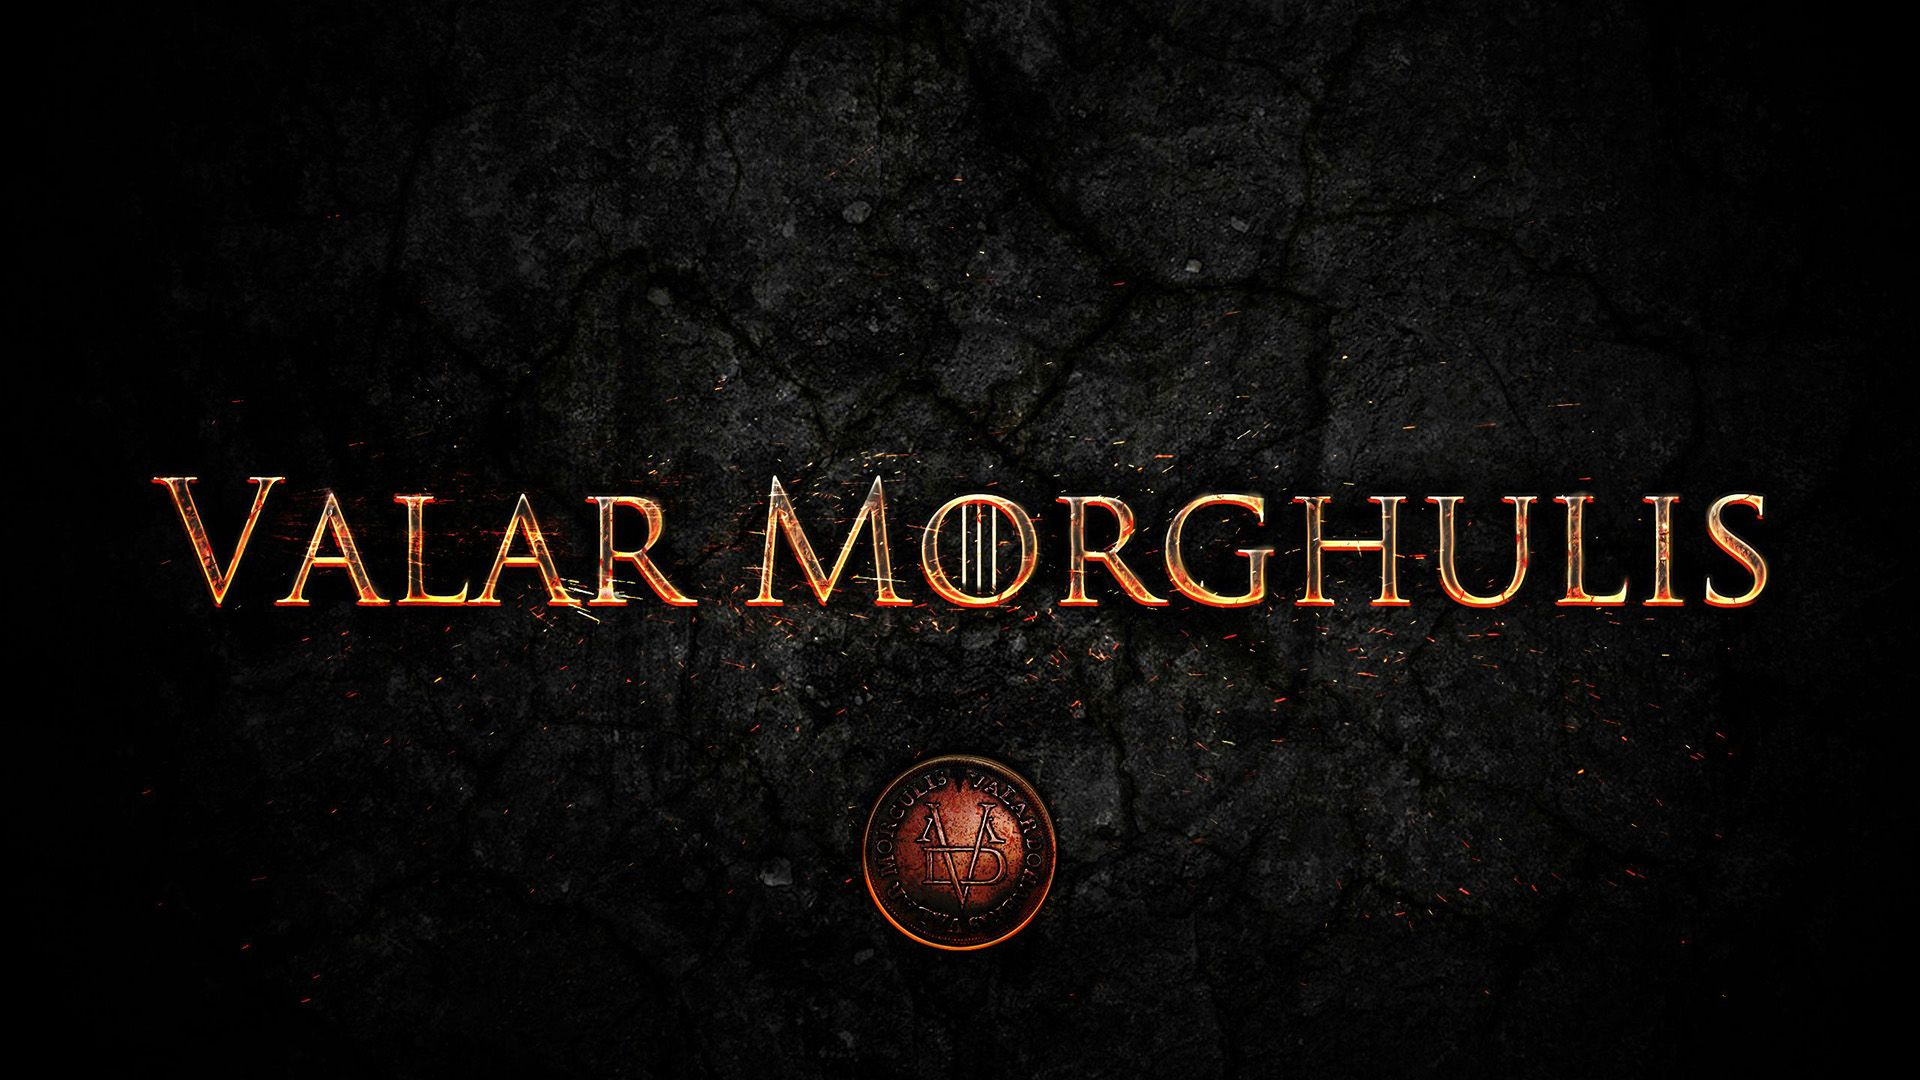

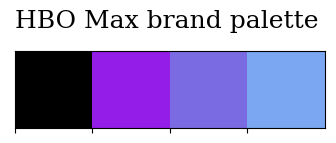

In [37]:
# Palette
sns.palplot(['#000000', '#941DE8','#7A6BE2','#7BA7F2'])

# Color palette:  ['#000000', '#941DE8','#7A6BE2','#7BA7F2']    

plt.title("HBO Max brand palette ",loc='left',fontfamily='serif',fontsize=18,y=1.2)
plt.show()

In [79]:
count_data = showtime['type'].value_counts()

# Create a horizontal bar chart
fig = go.Figure(data=go.Bar(
    y=count_data.index,
    x=count_data.values,
    orientation='h',
    marker=dict(color=['#7A6BE2', '#7BA7F2'])
))

# Set title and axis labels
fig.update_layout(
    title='Content on HBO Max',
    xaxis_title='Count',
    yaxis_title='Type of Content', title_x = 0.5
)
fig.show()

In [63]:
top_countries = pd.DataFrame(showtime['production_country'].value_counts()[:10])
top_countries = top_countries.reset_index()
top_countries = top_countries[top_countries['index'] != 'No Data']
top_countries

,index,production_country
0,US,2123
1,GB,212
2,FR,114
3,JP,106
5,DE,53
6,CA,37
7,ES,34
8,IT,29
9,MX,26


In [64]:
top_countries = top_countries.rename(columns = {
    'index' : 'production_country',
    'production_country' : 'content_produced'
})
top_countries

,production_country,content_produced
0,US,2123
1,GB,212
2,FR,114
3,JP,106
5,DE,53
6,CA,37
7,ES,34
8,IT,29
9,MX,26


In [74]:
top_countries = top_countries[:4]
fig = px.pie(top_countries, values='content_produced', names='production_country',
             title='Contribution of Content Produced by Top 4 Countries on HBO Max')

# Change the color palette
fig.update_traces(marker=dict(colors=['#000000', '#941DE8','#7A6BE2','#7BA7F2']))

# Set the text position and information to be displayed
fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.update_traces(title_x = 0.5)


fig.show()

In [92]:
country_order = showtime['production_country'].value_counts()[:11].index
data = showtime[['type', 'production_country']].groupby('production_country')['type'].value_counts().unstack().loc[country_order]
data['sum'] = data.sum(axis=1)
data_ratio = (data.T / data['sum']).T[['MOVIE', 'SHOW']].sort_values(by='MOVIE',ascending=False)[::-1]
data_ratio = data_ratio.reset_index()

In [93]:
data_ratio = data_ratio[data_ratio['index'] != 'No Data']

In [94]:
data_ratio.rename(columns = {'index':'country_code'}, inplace = True)
data_ratio['MOVIE'] = round(data_ratio['MOVIE'], 2)
# data_ratio['MOVIE'] = (data_ratio['MOVIE'] * 100).astype(str) + '%'

In [95]:
data_ratio['SHOW'] = round(data_ratio['SHOW'],2)
# data_ratio

In [164]:
fig = go.Figure()
# ['#221f1f', '#b20710', '#e50914','#f5f5f1','#ffffff']
# Add horizontal bar traces for MOVIE and SHOW
fig.add_trace(go.Bar(
    y=data_ratio.country_code,
    x=data_ratio['MOVIE'],
    name='MOVIE',
    orientation='h',
    marker=dict(color='#941DE8'),
    text=(data_ratio['MOVIE'] * 100).astype(str) + '%',  # Add text as percentages
    textposition='inside',  # Set text position inside the bars
    textfont=dict(color='white')  # Set text color
))

fig.add_trace(go.Bar(
    y=data_ratio.country_code,
    x=data_ratio['SHOW'],
    name='SHOW',
    orientation='h',
    marker=dict(color='#7BA7F2'),
    text=(data_ratio['SHOW'] * 100).astype(str) + '%',  # Add text as percentages
    textposition='inside',  # Set text position inside the bars
    textfont=dict(color='white')  # Set text color
))

# Set the layout
fig.update_layout(
    title='Content Distribution by Country on HBO Max',
    barmode='stack',
    yaxis_title='Top 10 Countries',
    xaxis=dict(showticklabels=False), title_x = 0.5 # Hide the x-axis tick labels
)

fig.show()

In [97]:
genre_distribution = pd.DataFrame(showtime.groupby('primary_genre')['type'].value_counts())
genre_distribution = genre_distribution.unstack().reset_index().fillna(0).drop(0)
genre_distribution['SUM'] = genre_distribution.sum(axis = 1)

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_64334/3203419532.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [98]:
genre_distribution.columns = ['primary_genre', 'MOVIE', 'SHOW', 'total']

In [99]:
genre_distribution = genre_distribution.sort_values('total', ascending = False)

In [165]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(
    x=genre_distribution['primary_genre'],
    y=genre_distribution['MOVIE'],
    name='MOVIE',
    marker=dict(color='#000000'),
))

fig1.add_trace(go.Bar(
    x=genre_distribution['primary_genre'],
    y=genre_distribution['SHOW'],
    name='SHOW',
    marker=dict(color='#7BA7F2'),
))

fig1.update_layout(
    title='Content Distribution by Genre on HBO Max',
    xaxis_title='Genre',
    yaxis_title='Content on HBO Max',
    barmode='stack'
)
fig1.show()

In [106]:
rating_distribution = pd.DataFrame(showtime.groupby('age_certification')['type'].value_counts())
# rating_distribution = genre_distribution.unstack().reset_index().fillna(0).drop(0)
rating_distribution = rating_distribution.unstack().reset_index().fillna(0)
rating_distribution['SUM'] = rating_distribution.sum(axis = 1)
rating_distribution.columns = ['age_certification','MOVIE','SHOW','Total']

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_64334/2154306660.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [109]:
rating_distribution = rating_distribution.sort_values('Total', ascending = False)

In [111]:
fig2 = go.Figure()

fig2.add_trace(go.Bar(
    x=rating_distribution['age_certification'],
    y=rating_distribution['MOVIE'],
    name='MOVIE',
    marker=dict(color='#000000'),

))

fig2.add_trace(go.Bar(
    x=rating_distribution['age_certification'],
    y=rating_distribution['SHOW'],
    name='SHOW',
    marker=dict(color='#7BA7F2'),

))

fig2.update_layout(
    title='Content Distribution by Age Rating Certification',
    xaxis_title='Genre',
    yaxis_title='Content on HBO Max',
    barmode='stack', legend_title = 'Type of Content', title_x = 0.5
)

fig2.show()

In [113]:
history = pd.DataFrame(showtime.groupby('release_year')['type'].value_counts())
history = history.unstack().reset_index().fillna(0)
# history['total'] = history.sum(axis = 1)
history.columns = ['release_year','MOVIE','SHOW']
history = history[(history['release_year'] >= 2000) & (history['release_year'] <= 2021)]

In [153]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(
    x=history['release_year'],
    y=history['MOVIE'],
    mode='lines',
    name='MOVIE',
    fill='tozeroy',
    line=dict(color='#000000')
))

fig3.add_trace(go.Scatter(
    x=history['release_year'],
    y=history['SHOW'],
    mode='lines',
    name='SHOW',
    fill='tozeroy',
    line=dict(color='#7BA7F2')
))

# Set the layout
fig3.update_layout(
    title='Content Trend  on HBO Max over the Years',
    xaxis_title='Release Year',
    yaxis_title='Content on HBO Max', showlegend = True, title_x =0.5
)
fig3.show()

In [116]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [117]:
demographic_data = showtime.copy()

In [118]:
demographic_data['target_ages'] = demographic_data['age_certification'].map(ratings_ages)

In [119]:
demographic_data = demographic_data.dropna()

In [120]:
# demographic_data.groupby('production_country','target_ages')[['production_country','target_ages']].sum()
demographic_data = demographic_data.groupby(['production_country', 'target_ages']).size().reset_index(name='count').sort_values('count', ascending = False)[:20]
demographic_data

,production_country,target_ages,count
79,US,Adults,646
82,US,Teens,354
81,US,Older Kids,245
42,GB,Adults,63
80,US,Kids,59
44,GB,Older Kids,29
45,GB,Teens,28
16,CA,Adults,22
60,JP,Older Kids,22
25,DE,Adults,20


In [122]:
total_count = demographic_data['count'].sum()
demographic_data['percentage'] = (demographic_data['count'] / total_count) * 100

fig = px.treemap(demographic_data, path=['production_country', 'target_ages'], values='percentage',
                 color='target_ages', color_discrete_sequence= ['#000000', '#941DE8','#7A6BE2','#7BA7F2'])

fig.update_layout(title= "HBO Max's Country-Level Target Audience",
                  margin=dict(l=20, r=20, t=40, b=20), title_x = 0.5)  # Adjust the margins as needed

fig.show()

In [123]:
demo_genre = showtime.groupby(['production_country', 'primary_genre']).size().reset_index(name='count').sort_values('count', ascending = False)[:20]

In [124]:
demo_genre = demo_genre[demo_genre['production_country']!='No Data']

In [154]:
fig = px.treemap(demo_genre, path=['production_country', 'primary_genre'], values='count', 
                    color_discrete_sequence= ['#000000', '#941DE8','#7A6BE2','#7BA7F2'])

fig.update_layout(title='HBO Max Content by Genre and Country',
                  margin=dict(l=20, r=20, t=40, b=20), title_x = 0.5)  # Adjust the margins as needed

fig.show()

In [126]:
fig = px.scatter(showtime, x='imdb_score', y='tmdb_score', color='type',
                 color_discrete_map={'MOVIE': '#000000', 'SHOW': '#7BA7F2'},
                 hover_data=['title'])

fig.update_layout(title='IMDb Score vs TMDB Score',
                  xaxis_title='IMDb Score',
                  yaxis_title='TMDB Score',
                  legend_title='Type', title_x =0.5)

fig.show()

In [129]:
fig = px.scatter(showtime, x='roberta_neg', y='roberta_pos', color='type',
                 color_discrete_map={'MOVIE': '#941DE8', 'SHOW': '#7BA7F2'},
                 hover_data=['title'])

fig.update_layout(title='Roberta Negative Score vs Roberta Positive Score',
                  xaxis_title='Roberta Negative Score',
                  yaxis_title='Roberta Positive Score',
                  legend_title='Type', title_x = 0.5)

fig.show()

In [130]:
showtime['sentiment'] = showtime.apply(lambda row: 'Negative' if row['roberta_neg'] > 0.5 else ('Neutral' if row['roberta_neu'] > 0.5 else 'Positive'), axis=1)


In [131]:
sentiment_counts = showtime['sentiment'].value_counts()

# Create the donut chart trace
fig4 = go.Figure(data=[go.Pie(
    labels=sentiment_counts.index,
    values=sentiment_counts.values,
    hole=0.5,  # Set the hole parameter to create a donut chart
    marker=dict(colors=['#000000', '#941DE8','#7A6BE2','#7BA7F2']),  # Set custom colors for the slices
    textinfo='label+percent',  # Display labels and percentages
    textposition='inside',  # Set the position of the labels inside the slice
)])

# Set the layout
fig4.update_layout(
    title='Sentiment Distribution of Content on HBO Max',
    showlegend=True, title_x = 0.5, 
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='HBO Max', x=0.50, y=0.5, font_size=15, showarrow=False)]
)
fig4.show()

In [133]:
fig = px.scatter(showtime, x='imdb_score', y='tmdb_score', color='sentiment',
                 color_discrete_map={'Negative': '#000000', 'Neutral': '#941DE8', 'Positive': '#7BA7F2'},
                 hover_data=['title'])

fig.update_layout(title='IMDb Score vs TMDB Score',
                  xaxis_title='IMDb Score',
                  yaxis_title='TMDB Score',
                  legend_title='Type', title_x = 0.5)

fig.show()

In [134]:
genre_sentiment = showtime.groupby(['primary_genre', 'sentiment']).size().reset_index(name='count')
genre_sentiment = genre_sentiment[genre_sentiment['primary_genre']!= 'No Data']
genre_sentiment = genre_sentiment.sort_values('count', ascending = False)

In [166]:
colors = ['#000000', '#941DE8','#7A6BE2','#7BA7F2']

fig = px.sunburst(genre_sentiment, path=['primary_genre', 'sentiment'], values='count',
                  color_discrete_sequence=colors)

fig.update_layout(title='Sentiments based Genre Strategy on HBO Max', title_x = 0.5)

fig.show()

In [136]:
age_certificate_sentiment = showtime.groupby(['age_certification', 'sentiment']).size().reset_index(name='count')
age_certificate_sentiment = age_certificate_sentiment[age_certificate_sentiment['age_certification']!= 'No Data']
age_certificate_sentiment = age_certificate_sentiment.sort_values('count', ascending = False)

In [168]:
fig = px.sunburst(age_certificate_sentiment, path=['age_certification', 'sentiment'], values='count',
                  color_discrete_sequence=colors)

fig.update_layout(title='Sentiments based Age Certification Rating Target Strategy on HBO Max', title_x = 0.5)

fig.show()

In [169]:
filter_showtime = showtime[(showtime['release_year'] >= 2010) & (showtime['release_year'] <= 2020)]

filter_showtime = filter_showtime.groupby(['release_year', 'sentiment']).size().reset_index(name='count')

colors = ['#000000', '#941DE8','#7A6BE2','#7BA7F2']

fig = px.area(filter_showtime, x='release_year', y='count', color='sentiment',
              color_discrete_sequence=colors,
              title='Trend of Content Released on HBO Max Over Time')


fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Content Produced',
    legend_title='Sentiment', title_x = 0.5
)
fig.show()

In [140]:
showtime['title'] = showtime['title'].astype(str)
title_corpus = ' '.join(showtime['title'])

In [141]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image #to load our image

In [142]:
stopwords = set(STOPWORDS)

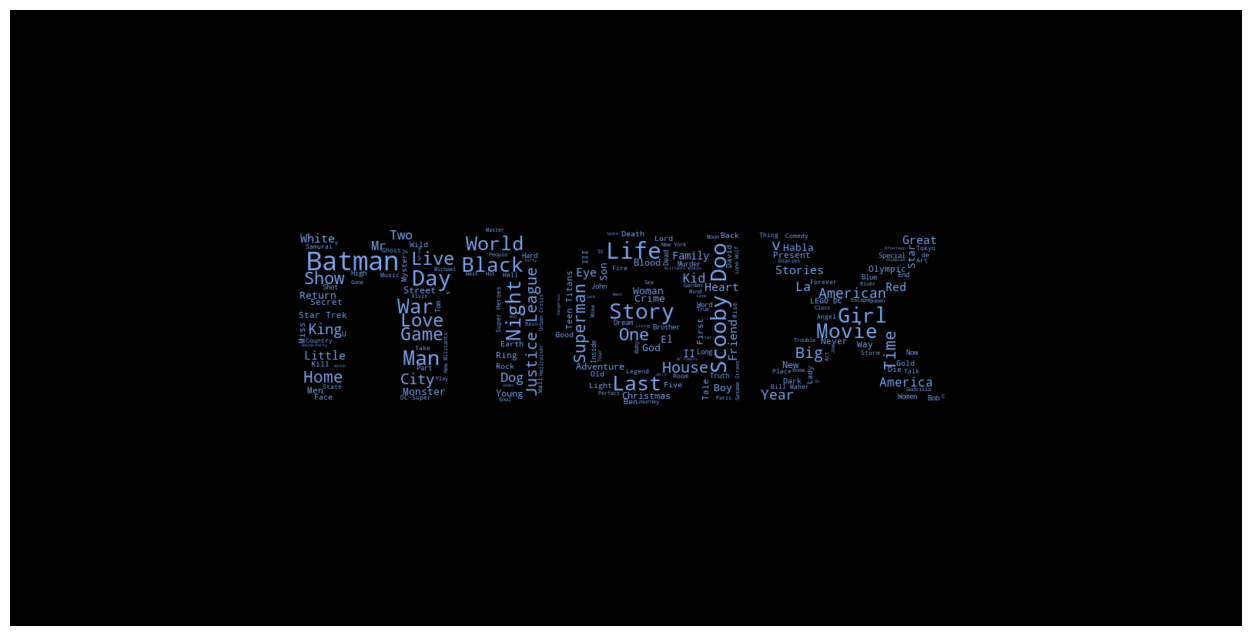

In [151]:
# Define a function to specify the text color
def hbo_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return "#7BA7F2"

custom_mask = np.array(Image.open('max-logo-1.jpg.webp')) 
wc = WordCloud(
               stopwords = stopwords,
               mask = custom_mask,height = 2000, width = 4000, color_func = hbo_color)
#background_color = 'white',
wc.generate(title_corpus)

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [152]:
showtime.head(2)

,id,roberta_neg,roberta_neu,roberta_pos,title,type,description,release_year,age_certification,runtime,...,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,production_country,country_name,sentiment
0,tm77588,0.325640,0.643882,0.030478,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,...,0,tt0034583,8.5,577842.0,22.005,8.167,drama,US,[United States],Neutral
1,tm155702,0.143535,0.642337,0.214129,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,...,0,tt0032138,8.1,406105.0,56.631,7.583,fantasy,US,[United States],Neutral


In [155]:
numeric_columns = showtime.select_dtypes(include=[int, float])
numeric_columns

,roberta_neg,roberta_neu,roberta_pos,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,0.325640,0.643882,0.030478,1943,102,8.5,577842.0,22.005,8.167
1,0.143535,0.642337,0.214129,1939,102,8.1,406105.0,56.631,7.583
2,0.687453,0.295608,0.016939,1941,119,8.3,446627.0,19.900,8.022
3,0.009764,0.497661,0.492575,1945,113,7.5,25589.0,8.311,7.000
4,0.016389,0.657064,0.326547,1940,8,7.7,859.0,1.400,10.000
...,...,...,...,...,...,...,...,...,...
3025,0.017739,0.576529,0.405732,2023,37,6.9,27.0,7.509,2.000
3026,0.073237,0.848339,0.078424,2023,62,5.5,45.0,3.402,6.000
3027,0.011362,0.804591,0.184047,2023,27,NaN,NaN,2.605,4.500
3028,0.001695,0.099840,0.898465,2023,95,7.8,255.0,9.371,NaN


In [170]:
colors = ['#000000', '#941DE8','#7A6BE2','#7BA7F2']

fig = px.histogram(showtime, x='runtime', color_discrete_sequence=colors)

# Customize the layout if needed
fig.update_layout(
    title='Content Runtime Distribution on HBO Max',
    xaxis_title='Runtime',
    yaxis_title='Count of Content', title_x = 0.5, bargap=0.2
)

fig.show()

In [158]:
colors = ['#000000', '#941DE8','#7A6BE2','#7BA7F2']

fig = px.histogram(showtime, x='imdb_score', color_discrete_sequence=colors)

# Customize the layout if needed
fig.update_layout(
    title='IMDB Score Distribution of Content on HBO Max',
    xaxis_title='IMDB Score',
    yaxis_title='Count of Content', title_x = 0.5, bargap=0.2
)

fig.show()

In [160]:
colors = ['#000000', '#941DE8','#7A6BE2','#7BA7F2']

fig = px.histogram(showtime, x='tmdb_score', color_discrete_sequence=colors)

# Customize the layout if needed
fig.update_layout(
    title='TMDB Score Distribution of Content on HBO Max',
    xaxis_title='TMDB Score',
    yaxis_title='Count of Content', title_x = 0.5, bargap=0.2
)

fig.show()

In [161]:
hbo_credits = pd.read_csv('hbo_credits.csv')

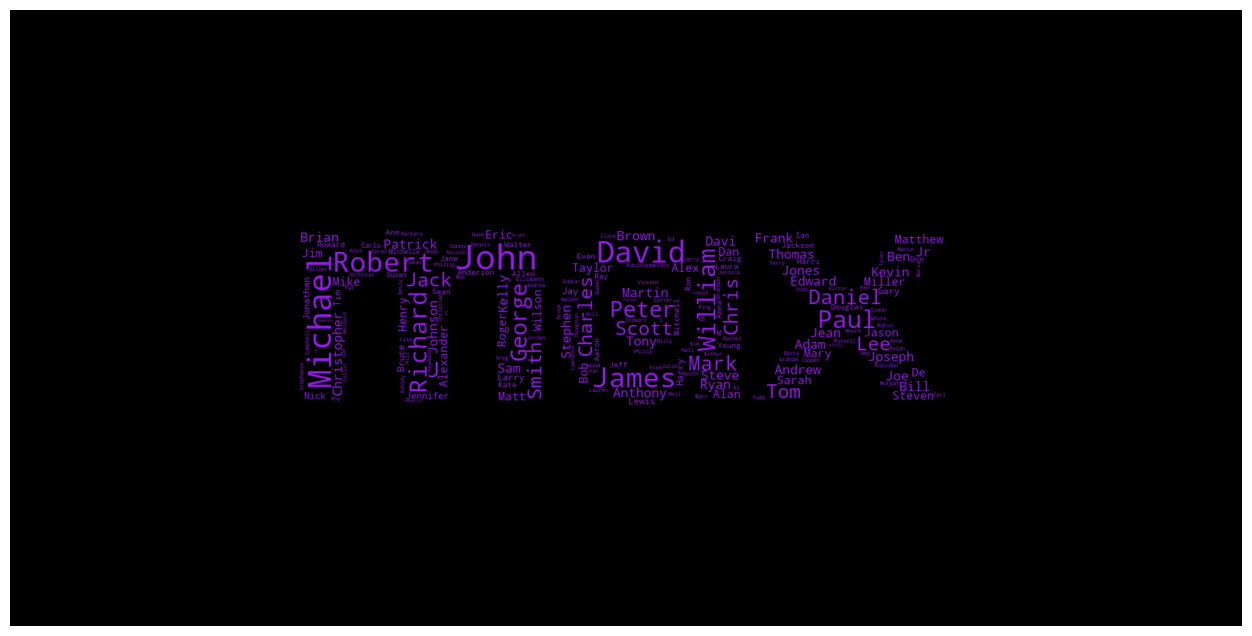

In [163]:
# most popular actor on amazon prime
hbo_credits['name'] = hbo_credits['name'].astype(str)
name_corpus = ' '.join(hbo_credits['name'])

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image #to load our image
stopwords = set(STOPWORDS)

# Define a function to specify the text color
def hbo_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return "#941DE8"

custom_mask = np.array(Image.open('max-logo-1.jpg.webp')) 
wc = WordCloud(
               stopwords = stopwords,
               mask = custom_mask,height = 2000, width = 4000, color_func = hbo_color)
#background_color = 'white',
wc.generate(name_corpus)

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()